# match_binning

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


# download

In [2]:
download_chandra_obsid 1838 evt2
mv -f 1838/primary/*evt2.fits.gz .
gunzip -f *evt2.fits.gz
rmdir -p 1838/primary
ls 


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits        3 Mb  ####################          < 1 s  37836.6 kb/s

acisf01838N004_evt2.fits  ds9_dax.kjg  match_binning.ipynb  zoom16_1.fits
diff.fits                 img.fits     match_binning.sh     zoom16_2.fits
ds9.png                   img2.fits    param                zoom_diff.fits


## create image


In [3]:
dmcopy "acisf01838N004_evt2.fits[sky=box(4182,4392,1172,1184)][bin x=::4,y=::4]" img.fits clob+


## what are image boundaries?

### dmlist cols

In [4]:
dmlist img.fits cols

 
--------------------------------------------------------------------------------
Columns for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   EVENTS_IMAGE[294,297]              Int2(294x297)  -                    
 
--------------------------------------------------------------------------------
Physical Axis Transforms for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    sky(x) = (+3595.50) +(+4.0)* ((#1)-(+0.50))
                 (y)   (+3799.50)  (+4.0)  ((#2) (+0.50))
 
--------------------------------------------------------------------------------
World Coordinate Axis Transforms for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    EQPOS(RA ) = (+278.3850)[deg] +TAN[(-0.000136667)

### dmlist subspace

In [5]:
dmlist img.fits subspace | grep sky

   1 sky                  Real8               Box(4182,4392,1172,1184)
   1 sky                  Real8               Field area = 1.39709e+06 Region area = 1.38765e+06
   1 sky                  [ 1] x                   3596.0:     4768.0 
   1 sky                  [ 2] y                   3800.0:     4984.0 
   1 sky                  Real8               Box(4182,4392,1172,1184)
   1 sky                  Real8               Field area = 1.39709e+06 Region area = 1.38765e+06
   1 sky                  [ 1] x                   3596.0:     4768.0 
   1 sky                  [ 2] y                   3800.0:     4984.0 
   1 sky                  Real8               Box(4182,4392,1172,1184)
   1 sky                  Real8               Field area = 1.39709e+06 Region area = 1.38765e+06
   1 sky                  [ 1] x                   3596.0:     4768.0 
   1 sky                  [ 2] y                   3800.0:     4984.0 
   1 sky                  Real8               Box(4182,4392,1172,1184)

### dmcoords

In [6]:
punlearn dmcoords
dmcoords img.fits opt=logical logicalx=0.5 logicaly=0.5 verb=0
pget dmcoords x y

3595.5
3799.5


In [7]:
punlearn dmcoords
dmcoords img.fits opt=logical logicalx=294.5 logicaly=297.5 verb=0
pget dmcoords x y

4771.5
4987.5


### get_sky_limits

In [8]:
get_sky_limits img.fits verbose=1

Running: get_sky_limits
  version: 07 October 2016
Checking binning of image: img.fits
  Image has 294 x 297 pixels
  Pixel size is 4.0 by 4.0
  Lower left (0.5,0.5) corner is x,y= 3595.5, 3799.5
  Upper right (294.5,297.5) corner is x,y= 4771.5, 4987.5
  DM filter is:
    x=3595.5:4771.5:#294,y=3799.5:4987.5:#297
  mkexpmap xygrid value is:
    3595.5:4771.5:#294,3799.5:4987.5:#297


In [9]:
pget get_sky_limits dmfilter

x=3595.5:4771.5:#294,y=3799.5:4987.5:#297


In [10]:
pget get_sky_limits xygrid

3595.5:4771.5:#294,3799.5:4987.5:#297


## Caveats

In [11]:
dmcopy "acisf01838N004_evt2.fits[bin x=3595.5:4771.5:#294,y=3799.5:4987.5:#297]" img2.fits clob+

In [12]:
dmimgcalc img.fits img2.fits diff.fits sub clob+

In [13]:
dmstat diff.fits centroid=no

diff.fits
    min:	-1 	      @:	( 3953.5 3801.5 )
    max:	0 	      @:	( 3597.5 3801.5 )
   mean:	-5.7261962024e-05 
  sigma:	0.0075669467483 
    sum:	-5 
   good:	87318 
   null:	0 


In [14]:
dmcopy "acisf01838N004_evt2.fits[bin x=3570:4874:16,y=3650:4980:16]" zoom16_1.fits cl+
dmcopy "acisf01838N004_evt2.fits[x=3570:4874,y=3650:4980][bin x=::16,y=::16]" zoom16_2.fits cl+
dmimgcalc zoom16_1.fits zoom16_2.fits zoom_diff.fits sub cl+
dmstat zoom_diff.fits centroid=no


zoom_diff.fits
    min:	-104 	      @:	( 4058 4250 )
    max:	164 	      @:	( 4058 4234 )
   mean:	0 
  sigma:	2.8512788255 
    sum:	0 
   good:	6888 
   null:	0 


[1] 37001
[1]+  Done                    ds9 zoom_diff.fits -scale linear -cmap load $ASCDS_CONTRIB/data/004-phase.lut -zoom to fit -scale limits -50 50 -saveimage png ds9.png


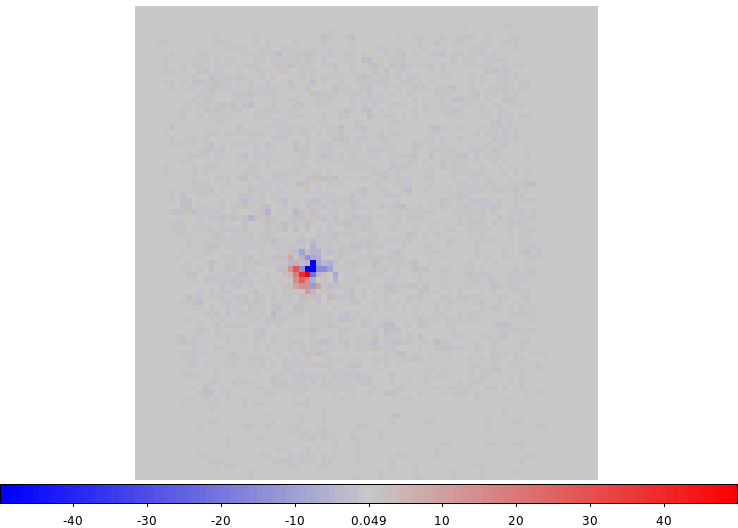

In [15]:
ds9 zoom_diff.fits -scale linear \
  -cmap load $ASCDS_CONTRIB/data/004-phase.lut \
  -zoom to fit -scale limits -50 50 -saveimage png ds9.png &
sleep 10
xpaset -p ds9 quit


display < ds9.png

# Cleanup


In [16]:
/bin/rm -f acisf01838N004_evt2.fits
